In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.datasets import make_blobs

# Correct file path
SS_RFM = '/Users/zabuza/Documents/B/Python/K-means cluster/Superstore_RFM.csv'

# Load the dataset
data = pd.read_csv(SS_RFM)

# Display the first few rows of the data
print(data.head())

  Customer ID  Customer Name  Recency  Frequeny       CLV  Profit   IPO  \
0    DP-13000  Darren Powers     -125        17   1050.64    23.0  3.41   
1    PO-19195  Phillina Ober      -85        10   1056.86    -4.7  3.20   
2    MB-18085     Mick Brown      -43        10   1428.23     8.2  3.90   
3    ME-17320  Maria Etezadi      -41        22  10663.73    17.4  3.73   
4    JO-15145  Jack O'Briant      -56        13   3254.95    17.9  4.54   

      AOV  Unnamed: 8  Unnamed: 9  
0   61.80         NaN         NaN  
1  105.69         NaN         NaN  
2  142.82         NaN         NaN  
3  484.71         NaN         NaN  
4  250.38         NaN         NaN  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    804 non-null    object 
 1   Customer Name  804 non-null    object 
 2   Recency        804 non-null    int64  
 3   Frequeny       804 non-null    int64  
 4   CLV            804 non-null    float64
 5   Profit         804 non-null    float64
 6   IPO            804 non-null    float64
 7   AOV            804 non-null    float64
 8   Unnamed: 8     0 non-null      float64
 9   Unnamed: 9     0 non-null      float64
dtypes: float64(6), int64(2), object(2)
memory usage: 62.9+ KB


In [5]:
# Rename 'Frequeny' to 'Frequency'
data.rename(columns={'Frequeny': 'Frequency'}, inplace=True)

# Verify change
print(data.columns)

Index(['Customer ID', 'Customer Name', 'Recency', 'Frequency', 'CLV', 'Profit',
       'IPO', 'AOV', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [7]:
data.describe(include = 'all').round(2)

,Customer ID,Customer Name,Recency,Frequency,CLV,Profit,IPO,AOV,Unnamed: 8,Unnamed: 9
count,804,804,804.00,804.00,804.00,804.00,804.00,804.00,0.0,0.0
unique,804,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,DP-13000,Harry Olson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-145.16,12.68,2893.70,10.98,3.79,225.24,NaN,NaN
std,NaN,NaN,185.83,6.57,2653.78,20.02,0.75,189.53,NaN,NaN
min,NaN,NaN,-1164.00,1.00,4.83,-136.70,1.00,2.42,NaN,NaN
25%,NaN,NaN,-179.75,8.00,1084.54,4.20,3.32,113.16,NaN,NaN
50%,NaN,NaN,-74.00,12.00,2243.39,14.50,3.75,180.90,NaN,NaN
75%,NaN,NaN,-28.00,16.00,3790.81,22.82,4.22,281.01,NaN,NaN


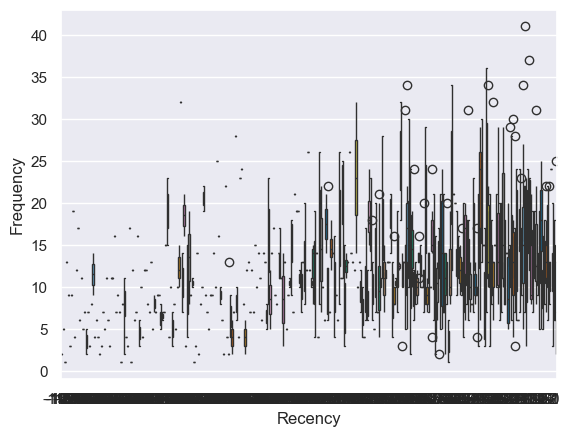

In [9]:
sns.set_theme()

ax = sns.boxplot(data = data,
                 x='Recency',
                 y='Frequency',
                 hue='Recency',
                 palette='colorblind',
                 legend=False)
              

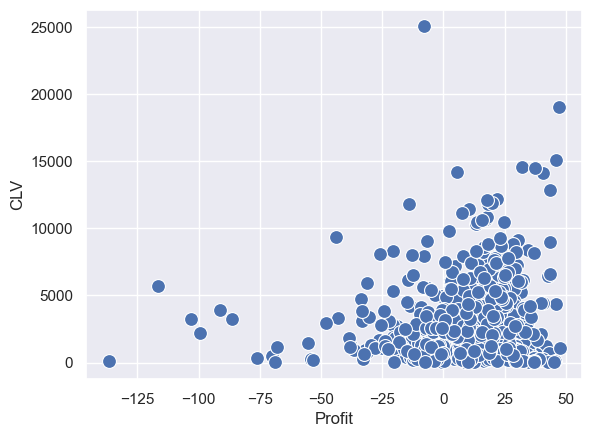

In [11]:
ax = sns.scatterplot(data = data,
                     x = 'Profit',
                     y = 'CLV',
                     s = 100)

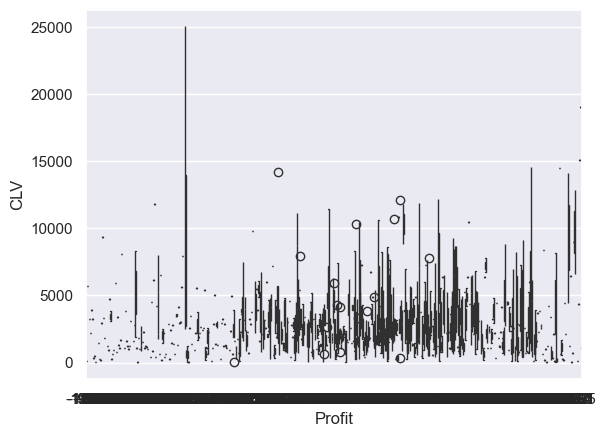

In [13]:
ax = sns.boxplot(data=data,
                 x='Profit',
                 y='CLV',
                 hue='Profit',
                 palette='colorblind',
                 legend=False)


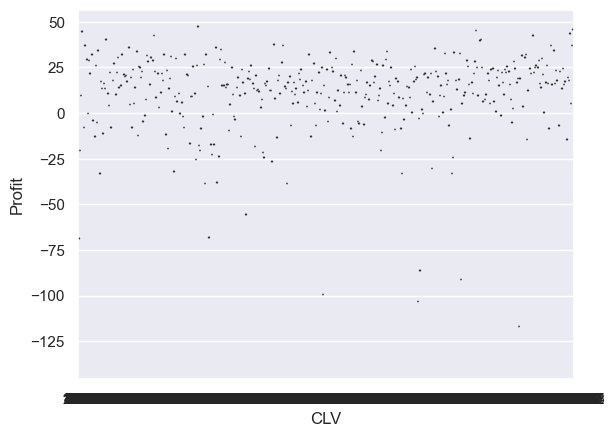

In [15]:
ax = sns.boxplot(data=data,
                 x='CLV',
                 y='Profit',
                 hue='CLV',
                 palette='colorblind',
                 legend=False)


In [17]:
scaler = StandardScaler()

In [19]:
data_scaledCLV_P = scaler.fit_transform(data[['CLV','Profit']])

In [21]:
data_scaledCLV_P = pd.DataFrame(data_scaledCLV_P, columns = ['CLV','Profit'])

In [23]:
data_scaledCLV_P.describe().round(2)

,CLV,Profit
count,804.00,804.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.09,-7.38
25%,-0.68,-0.34
50%,-0.25,0.18
75%,0.34,0.59
max,8.35,1.83


In [25]:
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [27]:
km.fit(data_scaledCLV_P)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [29]:
km.inertia_

716.471794115022

In [31]:
km.labels_

array([0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1,

In [33]:
pd.Series(km.labels_).value_counts().sort_index()

0    561
1    131
2    112
Name: count, dtype: int64

In [35]:
km.cluster_centers_

array([[-0.3024614 ,  0.31832881],
       [-0.33417915, -1.63576888],
       [ 1.90587781,  0.31877911]])

In [37]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                               columns = ['CLV','Profit'])
cluster_centers

,CLV,Profit
0,-0.302461,0.318329
1,-0.334179,-1.635769
2,1.905878,0.318779


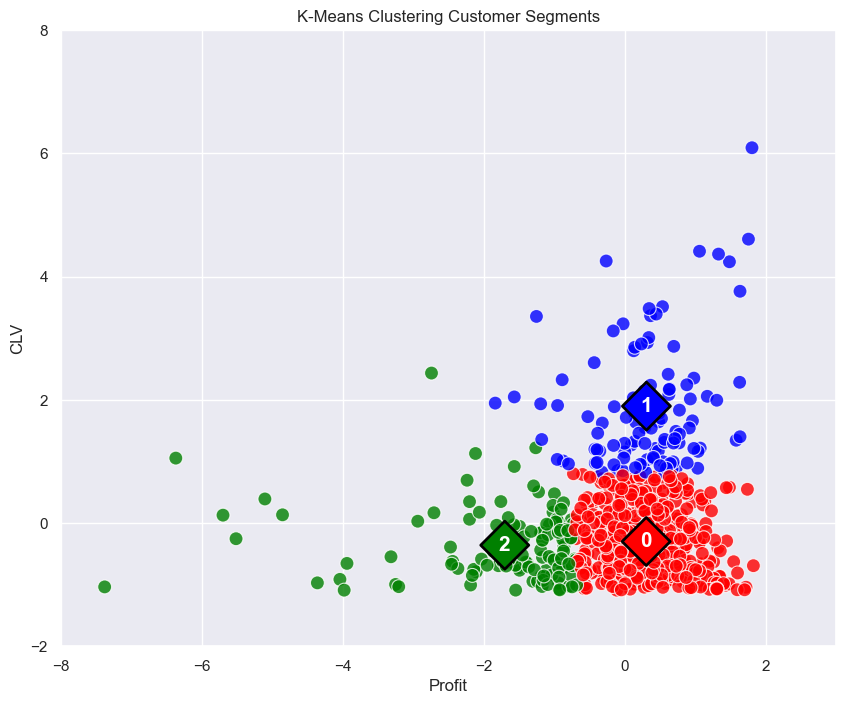

In [43]:
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaledCLV_P[['Profit', 'CLV']])  # Replace column names if needed

# Add cluster labels to the data
data_scaledCLV_P['Clusters'] = kmeans.labels_

# Define custom cluster colors
custom_palette = {0: 'red', 1: 'blue', 2: 'green'}

# Create a DataFrame for centroids
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Profit', 'CLV'])
cluster_centers['Clusters'] = [0, 1, 2]  # Match the cluster indices to the colors

# Set consistent axis limits
x_limits = (-8, 3)  # Replace with desired x-axis limits
y_limits = (-2, 8)  # Replace with desired y-axis limits

# Plot the Clusters
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=data_scaledCLV_P,
                     x='Profit',
                     y='CLV',
                     hue='Clusters',
                     palette=custom_palette,
                     alpha=0.8,
                     s=100,
                     legend=False)

# Plot the Centroids
ax = sns.scatterplot(data=cluster_centers,
                     x='Profit',
                     y='CLV',
                     hue='Clusters',
                     palette=custom_palette,
                     s=600,
                     marker='D',
                     ec='black',
                     legend=False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Profit[i],
             y=cluster_centers.CLV[i],
             s=cluster_centers.Clusters[i],
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')

# Set consistent axis limits
plt.xlim(x_limits)
plt.ylim(y_limits)

# Finalize the Plot
plt.title("K-Means Clustering Customer Segments")
plt.xlabel("Profit")
plt.ylabel("CLV")
plt.show()


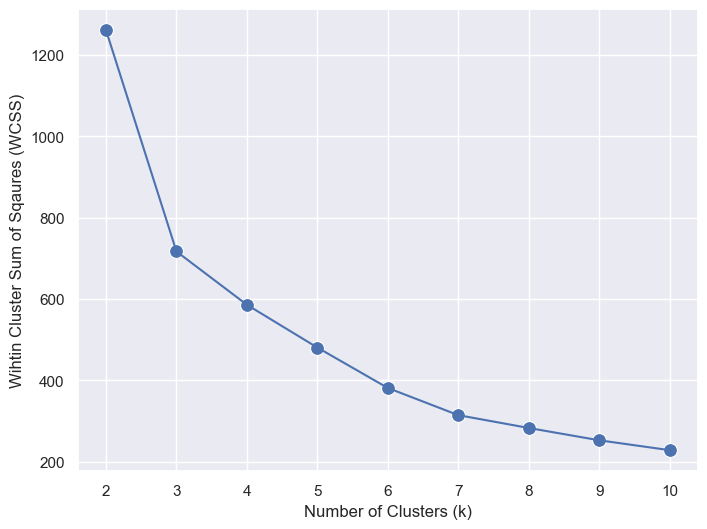

In [45]:
# Within Cluster Sum of Squares (WCSS)
wcss = []
for k in range(2,11):
        km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
        km.fit(data_scaledCLV_P)
        wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 100)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Wihtin Cluster Sum of Sqaures (WCSS)')

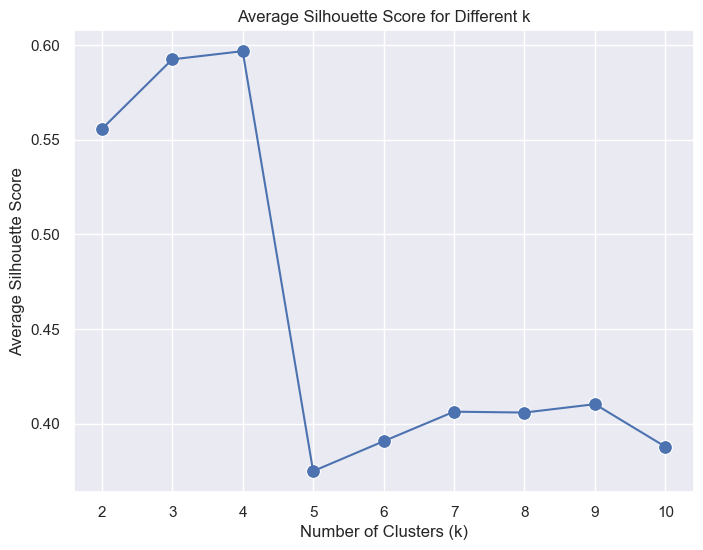

In [47]:
# Average Silhouette Score
silhouette = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    km = KMeans(n_clusters = k, n_init=25, random_state=1234)
    km.fit(data_scaledCLV_P)
    silhouette.append(silhouette_score(data_scaledCLV_P, km.labels_))

# Convert silhouette scores to a pandas Series for plotting
silhouette_series = pd.Series(silhouette, index=range(2, 11))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=100)
ax.set(xlabel='Number of Clusters (k)',
       ylabel='Average Silhouette Score',
       title='Average Silhouette Score for Different k')
plt.show()

In [45]:
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [47]:
km.fit(data_scaledCLV_P)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [49]:
data_scaledCLV_P['Clusters'] = km.labels_
data_scaledCLV_P.head(25)

,CLV,Profit,Clusters
0,-0.694936,0.601029,1
1,-0.692591,-0.783619,2
2,-0.552564,-0.138783,1
3,2.929735,0.321100,0
4,0.136212,0.346094,1
5,-0.951998,-0.018814,1
6,-0.692923,-1.793362,2
7,-0.951444,-0.288745,1
8,0.744172,-0.393718,1
9,3.234102,-0.023812,0


In [51]:
print(km.n_clusters)

3


In [53]:
data['Clusters'] = data_scaledCLV_P['Clusters']

print(data.head(25))
print(data['Clusters'].unique())

   Customer ID       Customer Name  Recency  Frequency       CLV  Profit  \
0     DP-13000       Darren Powers     -125         17   1050.64    23.0   
1     PO-19195       Phillina Ober      -85         10   1056.86    -4.7   
2     MB-18085          Mick Brown      -43         10   1428.23     8.2   
3     ME-17320       Maria Etezadi      -41         22  10663.73    17.4   
4     JO-15145       Jack O'Briant      -56         13   3254.95    17.9   
5     LS-17230    Lycoris Saunders     -776          6    368.88    10.6   
6     VS-21820    Vivek Sundaresam     -220          8   1055.98   -24.9   
7     MS-17830       Melanie Seite     -452          5    370.35     5.2   
8     AJ-10780      Anthony Jacobs      -74         15   4867.34     3.1   
9     SV-20365         Seth Vernon     -100         32  11470.95    10.5   
10    BD-11605        Brian Dahlen      -96         22   3332.87    19.7   
11    ND-18370   Natalie DeCherney      -26         18   4326.14     8.2   
12    MM-179

In [61]:
# Export the DataFrame to a CSV file
data.to_csv('/Users/zabuza/Documents/B/Python/K-means cluster/1. RXP.csv', index=False)
